<a href="https://colab.research.google.com/github/Windy-120202/Garment-worker-productivity/blob/main/Final_projek_Windy_Atika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Submission Proyek Akhir Studi Independen Bersertifikat Batch 7**

Nama : Windy Atika

Domisili : Pekanbaru, Riau

Email : 210103009@student.umri.ac.id

Kelas : Data Scientist B

In [ ]:
import pandas as pd

url = 'https://raw.githubusercontent.com/Windy-120202/Garment-worker-productivity/refs/heads/main/garments_worker_productivity%20(1).csv'
df = pd.read_csv(url)

df['date'] = pd.to_datetime(df['date'])

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split



# **Struktur Data**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   date                   1197 non-null   datetime64[ns]
 1   quarter                1197 non-null   object        
 2   department             1197 non-null   object        
 3   day                    1197 non-null   object        
 4   team_no                1197 non-null   int64         
 5   targeted_productivity  1197 non-null   float64       
 6   smv                    1197 non-null   float64       
 7   wip                    691 non-null    float64       
 8   over_time              1197 non-null   int64         
 9   incentive              1197 non-null   int64         
 10  idle_time              1197 non-null   float64       
 11  idle_men               1197 non-null   int64         
 12  no_of_style_change     1197 non-null   int64         
 13  no_

Dimensi Data

In [ ]:
df.head()

,date,quarter,department,day,team_no,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,2015-01-01,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,2015-01-01,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,2015-01-01,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,2015-01-01,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,2015-01-01,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [ ]:
df.shape

(1197, 15)

In [ ]:
df.describe()

,date,team_no,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197,1197.000000,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,2015-02-04 10:56:50.526315776,6.426901,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
min,2015-01-01 00:00:00,1.000000,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,2015-01-18 00:00:00,3.000000,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,2015-02-03 00:00:00,6.000000,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,2015-02-23 00:00:00,9.000000,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,2015-03-11 00:00:00,12.000000,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437
std,NaN,3.463963,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488


# **Missing Value**

In [ ]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team_no,0
targeted_productivity,0
smv,0
wip,506
over_time,0
incentive,0


mengisi nilai nul dengan '0' karena NaN hanya berapa pada department 'finishing'

In [ ]:
null_by_department = df.groupby('department')['wip'].apply(lambda x: x.isnull().sum())
print(null_by_department)

department
finishing    506
sweing         0
Name: wip, dtype: int64


In [ ]:
df['wip'] = df['wip'].fillna(0)

In [ ]:
df.isnull().sum()

,0
date,0
quarter,0
department,0
day,0
team_no,0
targeted_productivity,0
smv,0
wip,0
over_time,0
incentive,0


# **Cek Outlier**

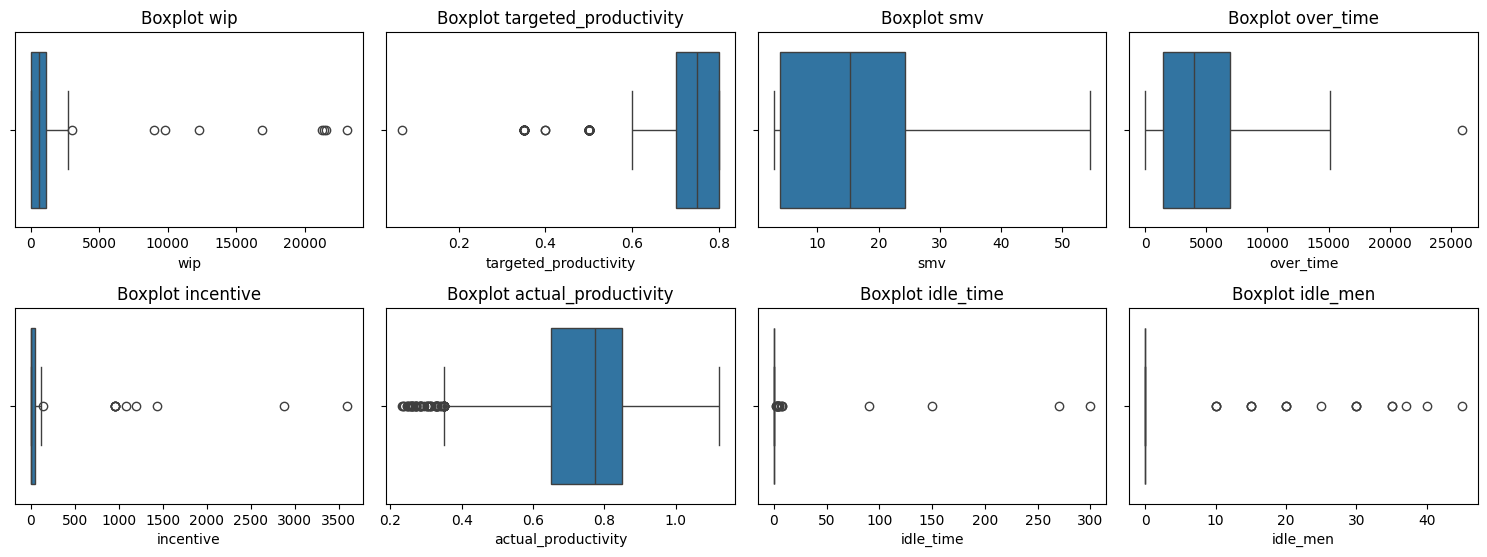

Handling Outlier

       targeted_productivity          wip     over_time    incentive  \
count            1197.000000  1197.000000   1197.000000  1197.000000   
mean                0.736842   592.109858   4558.538012    26.712615   
std                 0.075515   596.866547   3305.837733    31.563351   
min                 0.550000     0.000000      0.000000     0.000000   
25%                 0.700000     0.000000   1440.000000     0.000000   
50%                 0.750000   586.000000   3960.000000     0.000000   
75%                 0.800000  1083.000000   6960.000000    50.000000   
max                 0.800000  2707.500000  15240.000000   125.000000   

       actual_productivity  
count          1197.000000  
mean              0.737397  
std               0.168772  
min               0.350389  
25%               0.650307  
50%               0.773333  
75%               0.850253  
max               1.120437  


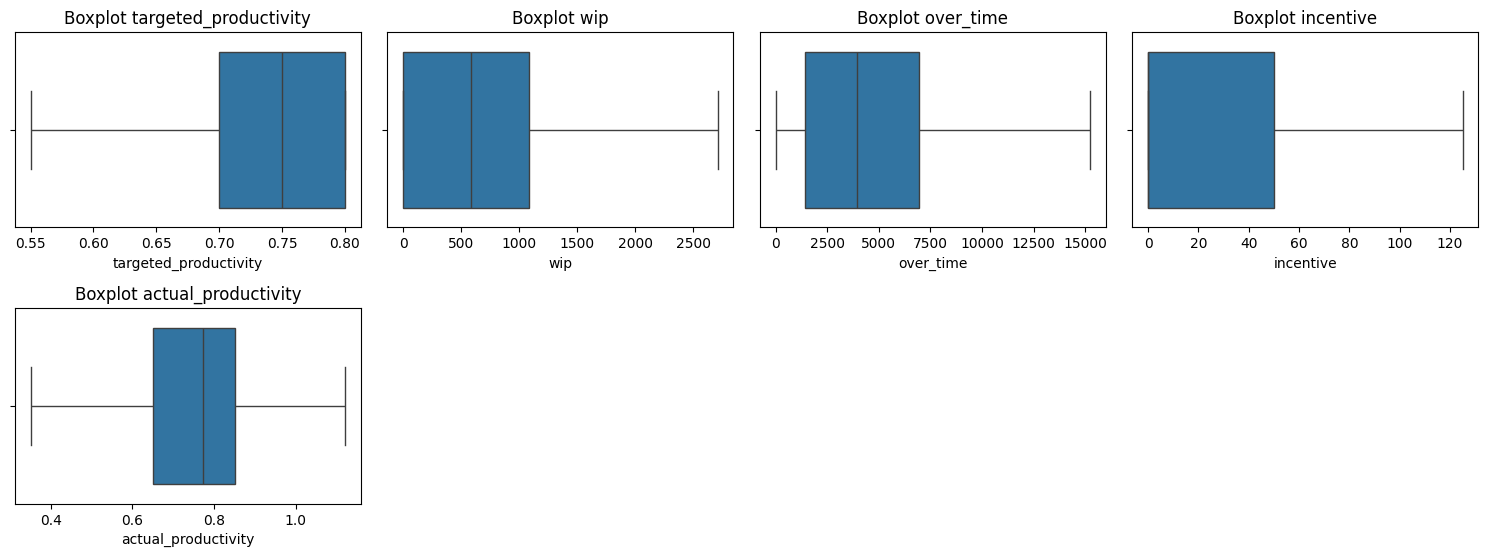

# **Exploratory Data Analysis**

Korelasi antar variabel

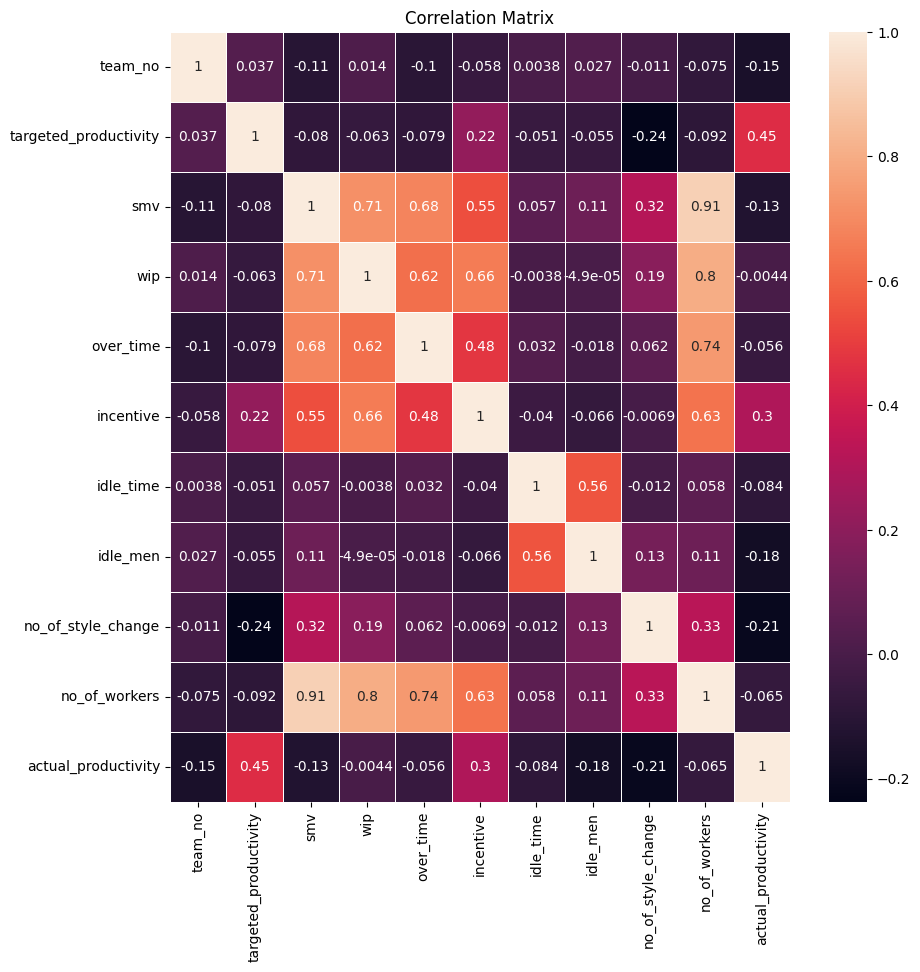

In [ ]:
numerical = df.select_dtypes(include=['number'])
corrMatrix = numerical.corr()

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True, linewidths=.5,ax=ax)
plt.title('Correlation Matrix')
plt.show()


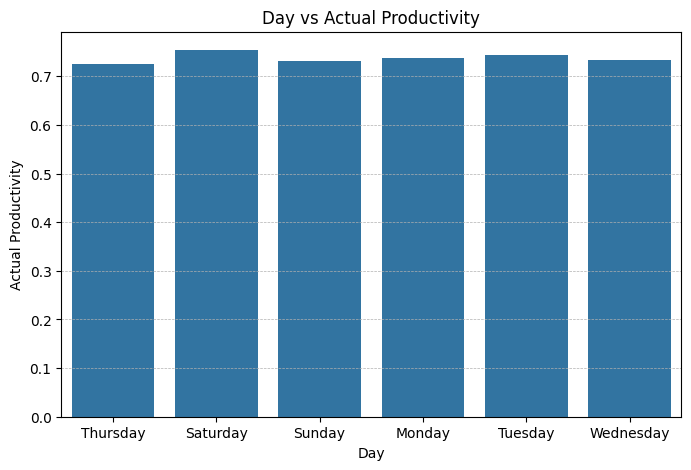

In [ ]:
# day vs actual_productivity
plt.figure(figsize=(8, 5))
sns.barplot(x='day', y='actual_productivity', data=df, ci=None)
plt.title("Day vs Actual Productivity")
plt.xlabel('Day')
plt.ylabel('Actual Productivity')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.show()

In [ ]:
df.department.value_counts()

,count
department,
sweing,691
finishing,506


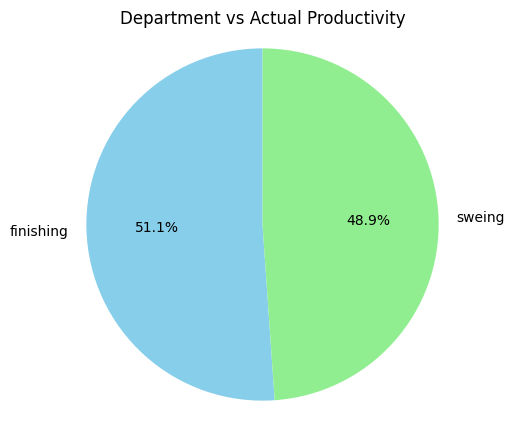

In [ ]:
# department vs actual_productivity
department_productivity = df.groupby('department')['actual_productivity'].mean()

plt.figure(figsize=(5, 5))
plt.pie(department_productivity, labels=department_productivity.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
plt.title('Department vs Actual Productivity')
plt.axis('equal')
plt.show()


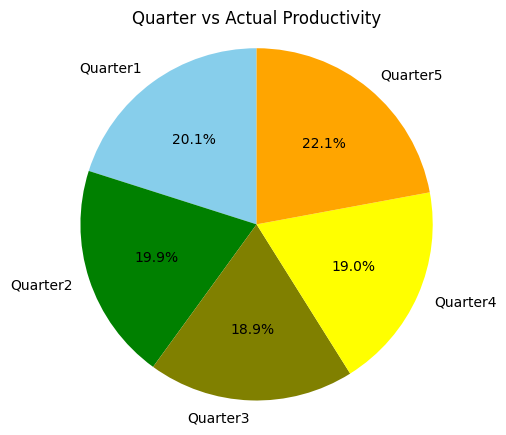

In [ ]:
# quarter vs actual_productivity
quarter_productivity = df.groupby('quarter')['actual_productivity'].mean()

plt.figure(figsize=(5, 5))
plt.pie(quarter_productivity, labels=quarter_productivity.index, autopct='%1.1f%%', startangle=90, colors=['skyblue','green','olive','yellow', 'orange'])
plt.title('Quarter vs Actual Productivity')
plt.axis('equal')
plt.show()




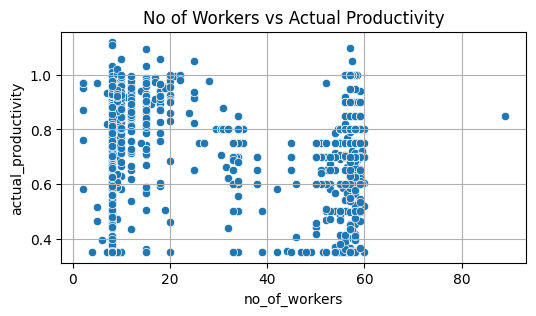

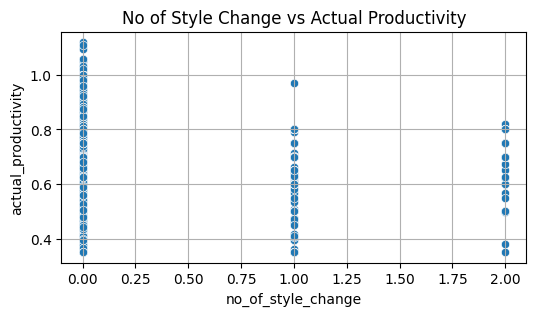

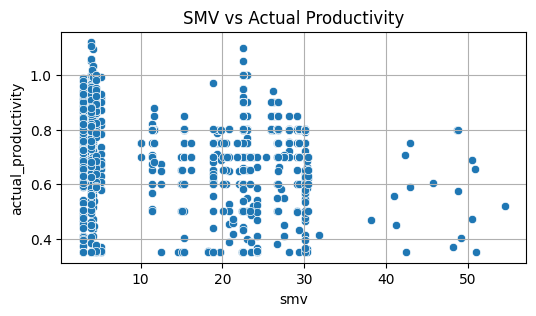

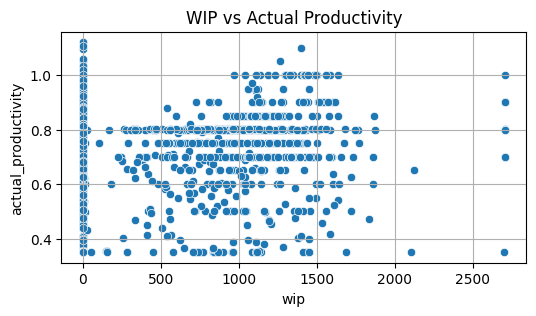

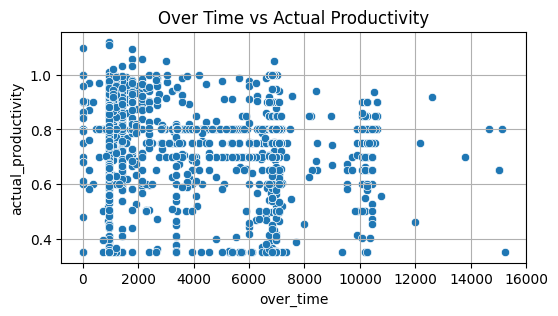

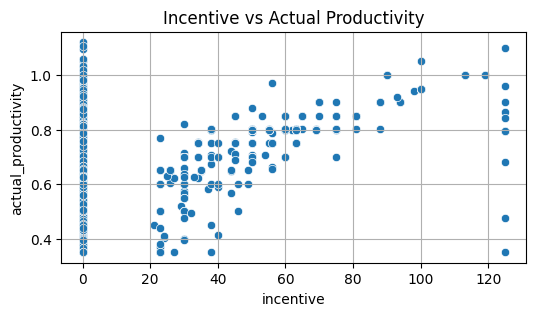

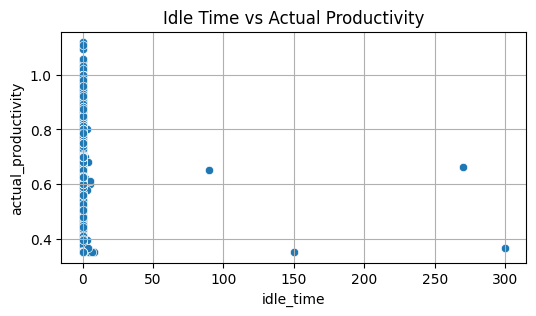

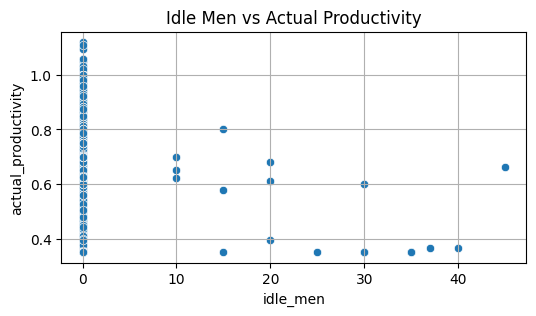

In [ ]:
# no_of_workers vs actual_productivity
plt.figure(figsize= (6, 3))
sns.scatterplot(x='no_of_workers', y='actual_productivity', data=df)
plt.title("No of Workers vs Actual Productivity")
plt.grid(True)
plt.show()

# no_of_style_change vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='no_of_style_change', y='actual_productivity', data=df)
plt.title("No of Style Change vs Actual Productivity")
plt.grid(True)
plt.show()

# smv vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='smv', y='actual_productivity', data=df)
plt.title("SMV vs Actual Productivity")
plt.grid(True)
plt.show()

# wip vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='wip', y='actual_productivity', data=df)
plt.title("WIP vs Actual Productivity")
plt.grid(True)
plt.show()

# over_time vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='over_time', y='actual_productivity', data=df)
plt.title("Over Time vs Actual Productivity")
plt.grid(True)
plt.show()

# incentive vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='incentive', y='actual_productivity', data=df)
plt.title("Incentive vs Actual Productivity")
plt.grid(True)
plt.show()

# idle_time vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='idle_time', y='actual_productivity', data=df)
plt.title("Idle Time vs Actual Productivity")
plt.grid(True)
plt.show()

# idle_men vs actual_productivity
plt.figure(figsize=(6, 3))
sns.scatterplot(x='idle_men', y='actual_productivity', data=df)
plt.title("Idle Men vs Actual Productivity")
plt.grid(True)
plt.show()

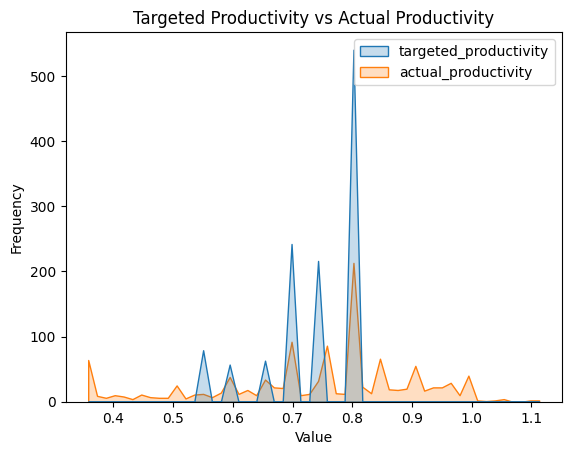

In [ ]:
sns.histplot(df[['targeted_productivity', 'actual_productivity']], element='poly')
plt.title('Targeted Productivity vs Actual Productivity')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# **Outlier**

In [ ]:
columns_to_visualize = ['wip','targeted_productivity','smv','over_time', 'incentive','actual_productivity', 'idle_time','idle_men']

plt.figure(figsize=(15, 8))
for i, col in enumerate(columns_to_visualize):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Handling Outlier

In [ ]:
outlier_columns = ['targeted_productivity','wip', 'over_time', 'incentive','actual_productivity']

for col in outlier_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

print(df[outlier_columns].describe())

In [ ]:
# after handling
plt.figure(figsize=(15, 8))
for i, col in enumerate(outlier_columns):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot {col}')
plt.tight_layout()
plt.show()

Feature Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()

label_encoder = LabelEncoder()

df['quarter'] = label_encoder.fit_transform(df_encoded['quarter'])
df['department'] = label_encoder.fit_transform(df_encoded['department'])
df['day'] = label_encoder.fit_transform(df_encoded['day'])

print(df.head())


        date  quarter  department  day  team_no  targeted_productivity    smv  \
0 2015-01-01        0           1    3        8                   0.80  26.16   
1 2015-01-01        0           0    3        1                   0.75   3.94   
2 2015-01-01        0           1    3       11                   0.80  11.41   
3 2015-01-01        0           1    3       12                   0.80  11.41   
4 2015-01-01        0           1    3        6                   0.80  25.90   

      wip  over_time  incentive  idle_time  idle_men  no_of_style_change  \
0  1108.0       7080         98        0.0         0                   0   
1     0.0        960          0        0.0         0                   0   
2   968.0       3660         50        0.0         0                   0   
3   968.0       3660         50        0.0         0                   0   
4  1170.0       1920         50        0.0         0                   0   

   no_of_workers  actual_productivity  
0           59.0

Seleksi Feature Relevant dengan K-Best

In [ ]:
X = df[['quarter','department','day','team_no','targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
        'idle_time', 'idle_men', 'no_of_style_change', 'no_of_workers']]
y = df['actual_productivity']

# f_regression
k_best_selector = SelectKBest(score_func=f_regression, k=5)
X_new = k_best_selector.fit_transform(X, y)

selected_features = pd.DataFrame({
    'Feature': X.columns,
    'Score': k_best_selector.scores_
}).sort_values(by='Score', ascending=False)

print("Top Features berdasarkan SelectKBest:")
print(selected_features)

Top Features berdasarkan SelectKBest:
                  Feature       Score
4   targeted_productivity  302.414924
8               incentive  117.318157
11     no_of_style_change   55.598606
10               idle_men   38.244599
3                 team_no   27.997073
5                     smv   20.297047
1              department   10.976784
9               idle_time    8.432670
12          no_of_workers    5.103550
7               over_time    3.792394
0                 quarter    3.079381
2                     day    0.352768
6                     wip    0.023078


Menghapus Variabel dengan multikolinearity threshold >5

In [ ]:
# VIF
X = df[['quarter','department','day','targeted_productivity', 'smv', 'wip', 'over_time', 'incentive',
        'idle_time', 'idle_men','team_no', 'no_of_style_change', 'no_of_workers']]

def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = data.columns
    vif_data['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

# Iterasi threshold >5
vif_threshold = 5.0
while True:
    vif_result = calculate_vif(X)
    max_vif = vif_result['VIF'].max()
    if max_vif > vif_threshold:
        feature_to_remove = vif_result.sort_values(by='VIF', ascending=False)['Feature'].iloc[0]
        print(f"Membuang variabel: {feature_to_remove} dengan VIF: {max_vif:.2f}")
        X = X.drop(columns=[feature_to_remove])
    else:
        break

print("\nHasil variabel multikolinearitas > 5:")
print(calculate_vif(X))

Membuang variabel: no_of_workers dengan VIF: 49.88
Membuang variabel: department dengan VIF: 21.87
Membuang variabel: targeted_productivity dengan VIF: 10.15
Membuang variabel: smv dengan VIF: 8.39

Hasil variabel multikolinearitas > 5:
              Feature       VIF
0             quarter  2.162227
1                 day  2.475029
2                 wip  4.893356
3           over_time  4.318373
4           incentive  3.174052
5           idle_time  1.485977
6            idle_men  1.526789
7             team_no  2.841889
8  no_of_style_change  1.289265


# **Modelling**

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 7.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 71.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 88.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 89.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 12.6 MB/s eta 0:00:00
   ━━━━

In [ ]:
from pycaret.regression import *

df_subset = df[[ 'wip', 'over_time', 'incentive','actual_productivity','day']]

clf = setup(data= df_subset,
            target= 'actual_productivity',
            session_id=123,
            normalize=True,
            train_size = 0.8)

,Description,Value
0,Session id,123
1,Target,actual_productivity
2,Target type,Regression
3,Original data shape,"(1197, 5)"
4,Transformed data shape,"(1197, 5)"
5,Transformed train set shape,"(957, 5)"
6,Transformed test set shape,"(240, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.0928,0.0172,0.1307,0.3937,0.0793,0.1571,0.2120
lightgbm,Light Gradient Boosting Machine,0.0931,0.0179,0.1333,0.3693,0.0808,0.1572,0.1210
rf,Random Forest Regressor,0.0897,0.0180,0.1336,0.3634,0.0808,0.1516,0.2660
et,Extra Trees Regressor,0.0888,0.0184,0.1347,0.3502,0.0817,0.1499,0.2670
ada,AdaBoost Regressor,0.1023,0.0192,0.1382,0.3196,0.0833,0.1684,0.0710
xgboost,Extreme Gradient Boosting,0.0934,0.0193,0.1382,0.3179,0.0837,0.1570,0.1100
knn,K Neighbors Regressor,0.1057,0.0220,0.1475,0.2289,0.0892,0.1795,0.0300
dt,Decision Tree Regressor,0.0983,0.0230,0.1510,0.1847,0.0920,0.1643,0.0260
lar,Least Angle Regression,0.1156,0.0240,0.1544,0.1522,0.0927,0.1941,0.0290
br,Bayesian Ridge,0.1157,0.0240,0.1544,0.1522,0.0928,0.1943,0.0250


Processing:   0%|          | 0/81 [00:00<?, ?it/s]